<a href="https://colab.research.google.com/github/kamilakhtar015/CaliHousing-PricePred/blob/main/Autoencoder_Tensorflow_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Tensorflow practice with autoencoder models")

Tensorflow practice with autoencoder models


In [3]:
# All library
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

print(f"Using TensorFlow version : {tf.__version__}")

Using TensorFlow version : 2.19.0


In [6]:
# Load the dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
# Proprocessing the data: Normalizing and Flatten

# Normalize pixel values from [0,255] to [0.1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the 28x28 images into 784-dimensional vectors
original_dim = np.prod(x_train.shape[1:])  # should be 784
x_train = x_train.reshape(len(x_train), original_dim)
x_test = x_test.reshape(len(x_test), original_dim)

x_train.shape, x_test.shape


((60000, 784), (10000, 784))

In [11]:
# Architecure : Defining the ENCODER and DECODER

# size of the bottelneck layer
encoding_dim = 32

# Input layer : shape of the input layer
input_layer = Input(shape=(original_dim,))

# Encoder Layer: Compresses the input to the bottleneck
encoded = Dense(encoding_dim, activation="relu")(input_layer)

# Decoder Layer: Reconstructs the input from bottleneck
decoded = Dense(original_dim, activation="sigmoid")(encoded)

# Autoencoder Model: Puts the encoder and decoder together
autoencoder = Model(input_layer, decoded)


In [12]:
# Compile - Configure the learning process
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#  Training the model
history = autoencoder.fit(x_train, x_train,
                          epochs = 50,
                          batch_size = 256,
                          shuffle = True,
                          validation_data = (x_test, x_test)
                          )

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3812 - val_loss: 0.1939
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1832 - val_loss: 0.1543
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1500 - val_loss: 0.1344
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1329 - val_loss: 0.1223
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1214 - val_loss: 0.1140
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1137 - val_loss: 0.1081
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1083 - val_loss: 0.1035
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1038 - val_loss: 0.1000
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1007 - val_loss: 0.0976
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0983 - val_loss: 0.0958
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0967 - val_loss: 0.0947
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s

In [15]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [16]:
# Using train model to predict the test images
reconstructed_images = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


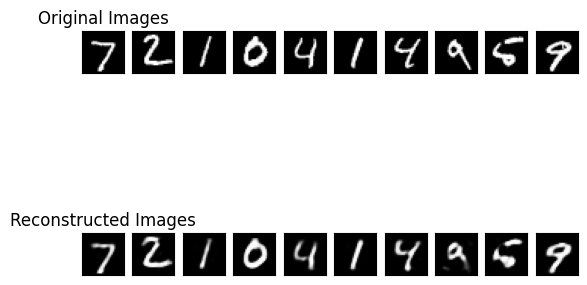

In [19]:
# Original vs reconstructed -- Plot
n = 10
for i in range(n):
  # original image
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap="gray")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == 0:
    ax.set_title("Original Images")

  # reconstructed image
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(reconstructed_images[i].reshape(28,28), cmap="gray")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  if i == 0:
    ax.set_title("Reconstructed Images")

plt.show()